# Benchmark Evaluation Notebook

Execute the first cell below, others can be executed in any order after.

For easy evaluation of results from benchmarking pipeline changes. 
Compare to [Erdem et al. (2022) Supplemental Information](https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-022-31138-1/MediaObjects/41467_2022_31138_MOESM1_ESM.pdf)


In [16]:
# Packages import
import os
import sys
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from scipy.optimize import curve_fit

# Get the directory path
wd = os.path.dirname(os.getcwd())

# Create the formatted path to the SPARCED input files
sparced_root = ('/'.join(wd.split(os.path.sep)[:wd.split(os.path.sep)
                                              .index('SingleCell')+1]))

sys.path.append(os.path.join(sparced_root, 'python/Experiment/visualization/'))
from viz_helpers import *


sys.path.append(os.path.join(sparced_root, 'python/sdist/singlecell'))
from tools.unit_converter import mpc2nanomolar, nanomolar2mpc

os.chdir(os.path.join(sparced_root, 'benchmarks'))

# Set global font to Arial
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 14,            # default size for all text
    'axes.titlesize': 16,       # axes title size
    'axes.labelsize': 14,       # x/y label size
    'xtick.labelsize': 12,      # x tick label size
    'ytick.labelsize': 12,      # y tick label size
    'legend.fontsize': 12       # legend font size
})

#prompt user for the date of simulation
def get_data_title():
    """Basic function for prompting the user for the benchmark's name. Applied 
    In Every Benchmark Cell."""
    return input('Enter the name of the simulation, default is date of (YYYY-MM-DD): ')

### Stochastic Expression Benchmark
[Compare to Erdem et al. Supp. Fig. 2](https://www.nature.com/articles/s41467-022-31138-1#MOESM1) \
Functional test to ensure the deterministic module is updated every 30 s with mRNA numbers generated by the stochastic module.

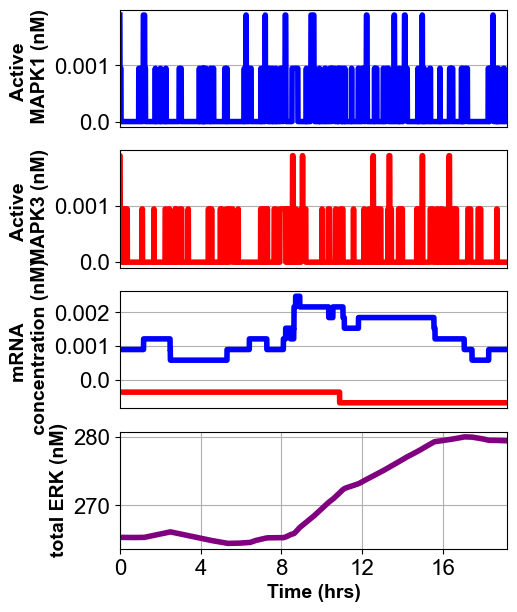

In [18]:
data_name = get_data_title()
with open(f'stochastic-expression/results/{data_name}.pkl', 'rb') as f: 
    data = pickle.load(f)

    fig, ax = plt.subplots(4, 1, figsize=(5, 7))

    benchmark1_key = [key for key in data.keys()][0]

    ax[0].plot(data[benchmark1_key]['MAPK1ac']['time']/3600.0,
            data[benchmark1_key]['MAPK1ac']['simulation'],'b',linewidth=4)

    ax[0].grid(True)
    ax[0].set_xlim(0, 24)
    ax[0].set_xticks([])
    ax[0].set_yticklabels(ax[0].get_yticks(), fontsize=16)
    ax[0].set_ylabel('Active \n MAPK1 (nM)', weight='bold')

    ax[1].plot(data[benchmark1_key]['MAPK3ac']['time']/3600.0,
                data[benchmark1_key]['MAPK3ac']['simulation'],'r',linewidth=4)
    ax[1].grid(True)
    ax[1].set_xlim(0, 24)
    ax[1].set_xticks([])
    ax[1].set_yticklabels(ax[0].get_yticks(), fontsize=16)
    ax[1].set_ylabel('Active \n MAPK3 (nM)', weight='bold')

    mRNA_MAPK1_2mpc = (data[benchmark1_key]['MAPK1_mRNA']['simulation']*
                       (1/(1.0E9/(5.2500E-12*6.023E+23))))
    mRNA_MAPK3_2mpc = (data[benchmark1_key]['MAPK3_mRNA']['simulation']*
                       (1/(1.0E9/(5.2500E-12*6.023E+23))))

    ax[2].plot(data[benchmark1_key]['MAPK1_mRNA']['time']/3600.0,
               mRNA_MAPK1_2mpc,'b',linewidth=4)
    ax[2].grid(True)
    ax[2].set_xlim(0, 24)
    ax[2].set_xticks([])
    ax[2].set_yticklabels(ax[0].get_yticks(), fontsize=16)
    ax[2].yaxis.get_offset_text().set_fontsize(24)
    ax[2].yaxis.get_offset_text().set_weight('bold')
    # ax[2].ticklabel_format(style='sci', scilimits=(1, 1))
    ax[2].plot(data[benchmark1_key]['MAPK3_mRNA']['time']/3600.0,mRNA_MAPK3_2mpc,
               'r',linewidth=4)
    ax[2].set_ylabel('mRNA \n concentration (nM)', weight='bold')

    ax[3].plot(data[benchmark1_key]['ERK_total']['time']/3600.0,
            data[benchmark1_key]['ERK_total']['simulation'],'k',linewidth=4, 
            color = 'purple')

    ax[3].set_xlabel('Time (hrs)', weight = 'bold')
    ax[3].set_ylabel('total ERK (nM)', multialignment='center', weight = 'bold')
    ax[3].grid(True)
    ax[3].set_xlim(0, 24)
    ax[3].set_yticklabels(ax[3].get_yticklabels(), fontsize = 16)
    ax[3].set_xticklabels(np.arange(0,25,step=4), fontsize=16)

    # For setting x-tick properties
    ax[3].tick_params(axis='both', labelsize=16)

    plt.savefig('stochastic-expression/results/Stochastic Expression of ERK Dynamics.png')

### Receptor-Ligand Cooperativity Benchmark
[Compare to Erdem et al. Supp. Fig. 3A](https://www.nature.com/articles/s41467-022-31138-1#MOESM1) \
Simulated ligand-receptor cooperativity coefficients for the receptor tyrosine kinases match experimental observations (negative cooperativity: EGF, FGF, IGF, INS; no cooperativity: HGF, NRG1, and positive cooperativity: PDGF).

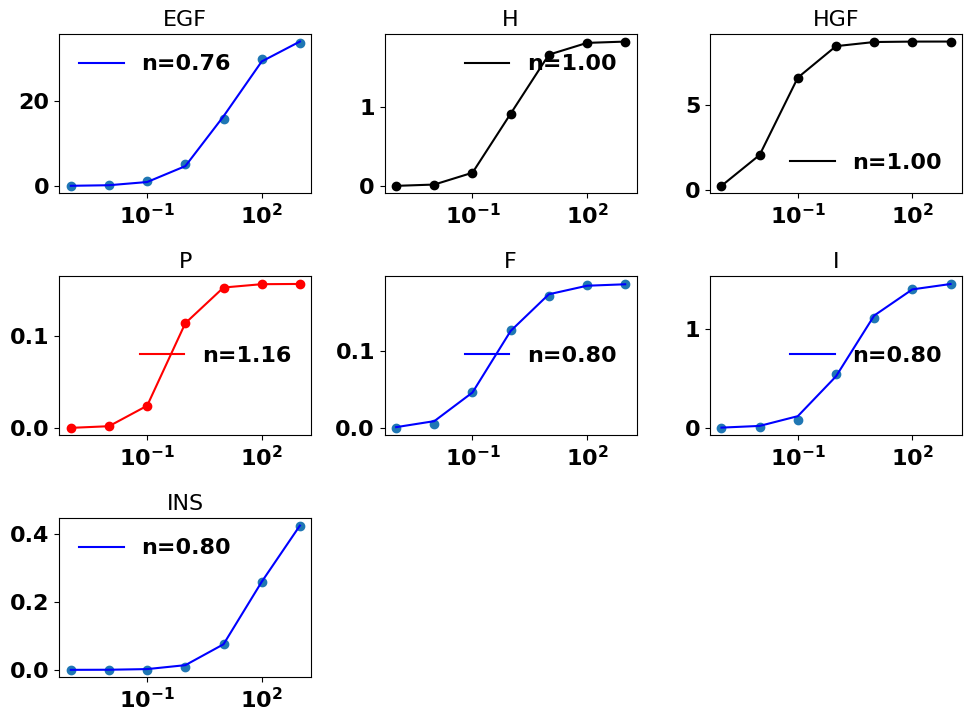

In [3]:
data_name = get_data_title()
with open(f'receptor-ligand_cooperativity/results/{data_name}.pkl', 'rb') as f:
    data = pickle.load(f)


# 
ligInds = [155,156,157,158,159,160,161]
ligConc = [0.001,0.01,0.1,1,10,100,1000]
ResInds = [162,166,167,170,171,172,173,174]
RecConc = 60.8754593

conds = {}

observables = ['EE1_species', 'HE3_species', 'HE4_species', 'HGF_species', 'Ppr_species',
                'Ffr_species', 'EE1E2_species', 'EE1Ev3_species', 'EE1E4_species', 'E2HE3_species', 
                'E1HE3_species', 'HE3E3_species', 'HE3Ev3_species', 'HE3E4_species', 'E2HE4_species', 
                'HE4Ev3_species', 'E1HE4_species', 'E3HE4_species', 'HE4E4_species', 'HGF_Met_Met_species', 
                'PPrPr_species', 'FFrFr_species', 'IIrIr_species', 'INS_Isr_Isr_species', 'EE1EE1_species', 
                'EE1HE3_species', 'EE1HE4_species', 'HE3HE3_species', 'HE3HE4_species', 'HE4HE4_species', 
                'HGF_Met_HGF_Met_species', 'PPrPPr_species', 'FFrFFr_species', 'IIrIrI_species', 'INS_Isr_Isr_INS_species']


for condition in data:
    SPInds = []
    SPPInds = []
    SPSPInds = []
    for i in range(6):
        SPInds.append(data[condition][observables[i]]['simulation'][-1])
    for i in range(6, 26):
        SPPInds.append(data[condition][observables[i]]['simulation'][-1])
    for i in range(26, 35):
        SPSPInds.append(data[condition][observables[i]]['simulation'][-1])

    ns_prod_sum = sum(SPInds) + sum(SPPInds) + 2.0*sum(SPSPInds)

    conds[condition] = ns_prod_sum


egf_results = list(conds.values())[0:7]
h_results = list(conds.values())[7:14]
hgf_results = list(conds.values())[14:21]
p_results = list(conds.values())[21:28]
f_results = list(conds.values())[28:35]
i_results = list(conds.values())[35:42]
ins_results = list(conds.values())[42:49]

list_of_results = [egf_results, h_results, hgf_results, p_results, f_results, i_results, ins_results]
list_of_ligands = ['EGF', 'H', 'HGF', 'P', 'F', 'I', 'INS']

# Define the Sigmoid-Hill equation
def func(x, a, b, c):
    return a * np.power(x, b) / (np.power(c, b) + np.power(x, b))

# Calculate the number of rows based on the number of results
num_results = len(list_of_results)
num_columns = 3
num_rows = -(-num_results // num_columns)  # Ceiling division to ensure all results are shown


# Set global plot attributes
plt.rc('font', size=16, weight='bold')  # Set fontsize and font weight
plt.rc('axes', titlesize=16)             # Set title fontsize
# plt.rc('axes', labelsize=12)             # Set label fontsize
plt.rc('xtick', labelsize=16)            # Set x-axis tick label fontsize
plt.rc('ytick', labelsize=16)            # Set y-axis tick label fontsize
plt.rc('legend', fontsize=16)
# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 7.5))

hill_curve_data = {}

# Loop through each lig_result and plot on separate subplots
for i, lig_result in enumerate(list_of_results):
    hill_curve_data[list_of_ligands[i]] = {}
    x_data = ligConc
    y_data = lig_result
    # Fit the curve
    params, covariance = curve_fit(func, x_data, y_data, maxfev = 100000)
    a_fit, b_fit, c_fit = params
    y_fit = func(x_data, a_fit, b_fit, c_fit)

    hill_curve_data[list_of_ligands[i]]['x'] = x_data
    hill_curve_data[list_of_ligands[i]]['y'] = y_data
    hill_curve_data[list_of_ligands[i]]['fit'] = y_fit
    hill_curve_data[list_of_ligands[i]]['hill coefficient'] = b_fit


axes[0, 0].scatter(hill_curve_data['EGF']['x'], hill_curve_data['EGF']['y'])
axes[0, 0].plot(hill_curve_data['EGF']['x'], hill_curve_data['EGF']['fit'], \
    label=f'n={hill_curve_data["EGF"]["hill coefficient"]:.2f}', color='blue')
axes[0, 0].set_title('EGF')
axes[0, 0].set_xscale('log', base=10)
axes[0, 0].legend(frameon=False)

axes[0, 1].scatter(hill_curve_data['H']['x'], hill_curve_data['H']['y'], color='black')
axes[0, 1].plot(hill_curve_data['H']['x'], hill_curve_data['H']['fit'], \
    label=f'n={hill_curve_data["H"]["hill coefficient"]:.2f}', color='black')
axes[0, 1].set_title('H')
axes[0, 1].set_xscale('log', base=10)
axes[0, 1].legend(frameon=False)

axes[0, 2].scatter(hill_curve_data['HGF']['x'], hill_curve_data['HGF']['y'], color='black')
axes[0, 2].plot(hill_curve_data['HGF']['x'], hill_curve_data['HGF']['fit'], \
    label=f'n={hill_curve_data["HGF"]["hill coefficient"]:.2f}', color='black')
axes[0, 2].set_title('HGF')
axes[0, 2].set_xscale('log', base=10)
axes[0, 2].legend(frameon=False)

axes[1, 0].scatter(hill_curve_data['P']['x'], hill_curve_data['P']['y'],color='red')
axes[1, 0].plot(hill_curve_data['P']['x'], hill_curve_data['P']['fit'], \
    label=f'n={hill_curve_data["P"]["hill coefficient"]:.2f}', color='red')
axes[1, 0].set_title('P')
axes[1, 0].set_xscale('log', base=10)
axes[1, 0].legend(frameon=False)

axes[1, 1].scatter(hill_curve_data['F']['x'], hill_curve_data['F']['y'])
axes[1, 1].plot(hill_curve_data['F']['x'], hill_curve_data['F']['fit'], \
    label=f'n={hill_curve_data["F"]["hill coefficient"]:.2f}', color='blue')
axes[1, 1].set_title('F')
axes[1, 1].set_xscale('log', base=10)
axes[1, 1].legend(frameon=False)

axes[1, 2].scatter(hill_curve_data['I']['x'], hill_curve_data['I']['y'])
axes[1, 2].plot(hill_curve_data['I']['x'], hill_curve_data['I']['fit'], \
    label=f'n={hill_curve_data["I"]["hill coefficient"]:.2f}', color='blue')
axes[1, 2].set_title('I')
axes[1, 2].set_xscale('log', base=10)
axes[1, 2].legend(frameon=False)

axes[2, 0].scatter(hill_curve_data['INS']['x'], hill_curve_data['INS']['y'])
axes[2, 0].plot(hill_curve_data['INS']['x'], hill_curve_data['INS']['fit'], \
    label=f'n={hill_curve_data["INS"]["hill coefficient"]:.2f}', color='blue')
axes[2, 0].set_title('INS')
axes[2, 0].set_xscale('log', base=10)
axes[2, 0].legend(frameon=False)


fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])
plt.tight_layout()

# Show the entire figure
plt.savefig('receptor-ligand-cooperativity.png')

### Proliferation and Growth Benchmark
[Compare to Erdem et al. Supp. Fig. 4](https://www.nature.com/articles/s41467-022-31138-1#MOESM1) \
EGF and insulin stimulation activates both ERK and AKT pathways. Dual stimulation with the two ligands induces prolonged AKT activation.

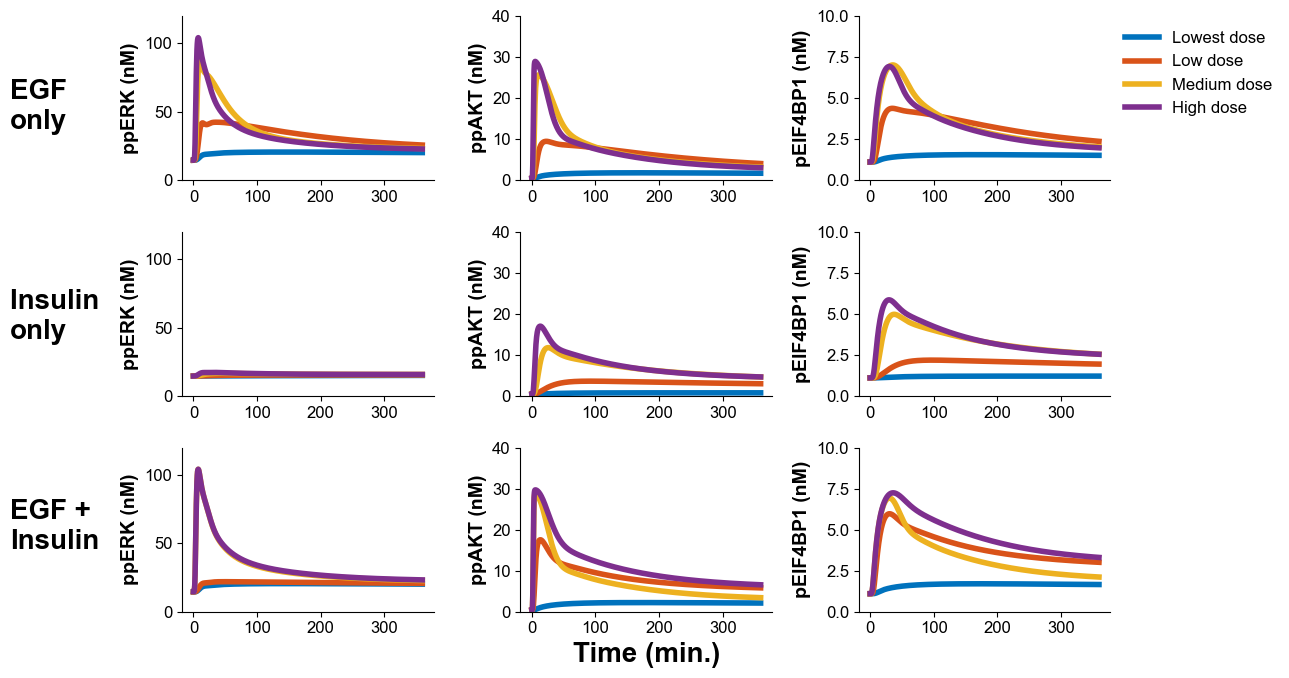

In [15]:
data_name = get_data_title()
with open(f'proliferation-growth/results/{data_name}.pkl', 'rb') as f:
    data = pickle.load(f)
    
conditions = list(data.keys())

fig, axs = plt.subplots(3, 3, figsize=(12, 7))

treatments = ['EGF \nonly', 'Insulin \nonly', 'EGF + \nInsulin']
observables = ['ppERK (nM)', 'ppAKT (nM)', 'pEIF4BP1 (nM)']
sep_ylims = [120, 40, 10]
colors = ['#0072bd', '#d95319', '#edb120', '#7e2f8e']
leg_labels = ['Lowest dose', 'Low dose', 'Medium dose', 'High dose']

# --- ppERK ---
for condition in conditions[:4]:
    axs[0, 0].plot(
        data[condition]['ppERK_total']['time']/60, 
        data[condition]['ppERK_total']['simulation'], 
        linewidth=4, color = colors[conditions.index(condition)], 
        label = leg_labels[conditions.index(condition)])
    axs[0, 1].plot(
        data[condition]['ppAKT_total']['time']/60, 
        data[condition]['ppAKT_total']['simulation'], 
        linewidth=4, color = colors[conditions.index(condition)], 
        label = leg_labels[conditions.index(condition)])
    axs[0, 2].plot(
        data[condition]['pEIF4BP1_total']['time']/60, 
        data[condition]['pEIF4BP1_total']['simulation'], 
        linewidth=4, color = colors[conditions.index(condition)], 
        label = leg_labels[conditions.index(condition)])

# --- ppAKT ---
for condition in conditions[4:8]:
    idx = conditions.index(condition) - 4
    axs[1, 0].plot(
        data[condition]['ppERK_total']['time']/60, 
        data[condition]['ppERK_total']['simulation'], 
        linewidth=4, color = colors[idx], label = leg_labels[idx])
    axs[1, 1].plot(
        data[condition]['ppAKT_total']['time']/60, 
        data[condition]['ppAKT_total']['simulation'], 
        linewidth=4, color = colors[idx], label = leg_labels[idx])
    axs[1, 2].plot(
        data[condition]['pEIF4BP1_total']['time']/60, 
        data[condition]['pEIF4BP1_total']['simulation'], 
        linewidth=4, color = colors[idx], label = leg_labels[idx])

# --- pEIF4EBP1 ---
for condition in conditions[8:12]:
    idx = conditions.index(condition) - 8
    axs[2, 0].plot(
        data[condition]['ppERK_total']['time']/60, 
        data[condition]['ppERK_total']['simulation'], 
        linewidth=4, color = colors[idx], label = leg_labels[idx])
    axs[2, 1].plot(
        data[condition]['ppAKT_total']['time']/60, 
        data[condition]['ppAKT_total']['simulation'], 
        linewidth=4, color = colors[idx], label = leg_labels[idx])
    axs[2, 2].plot(
        data[condition]['pEIF4BP1_total']['time']/60, 
        data[condition]['pEIF4BP1_total']['simulation'], 
        linewidth=4, color = colors[idx], label = leg_labels[idx])

# --- axis labels, limits, and despine ---
for i in range(3): 
    for j in range(3):
        axs[i, j].set_ylim(0, sep_ylims[j])
        sns.despine(ax=axs[i, j], right=True, top=True)
        axs[i, j].set_ylabel(observables[j], fontsize = 14, weight = 'bold', rotation = 90)

# --- x-axis label for center bottom row ---
axs[2, 1].set_xlabel('Time (min.)', fontsize=20, weight='bold')

# --- legend outside top-right plot ---
axs[0, 2].legend(
    labels=leg_labels, 
    frameon=False, 
    bbox_to_anchor=(1, 1), 
    loc='upper left'
)

fig.text(-0.075, 0.8, treatments[0], fontsize=20, weight='bold')
fig.text(-0.075, 0.5, treatments[1], fontsize=20, weight='bold')
fig.text(-0.075, 0.2, treatments[2], fontsize=20, weight='bold')


plt.tight_layout()
plt.show()


### DNA Repair Benchmark
[Compare to Erdem et al. Supp. Fig. 6a](https://www.nature.com/articles/s41467-022-31138-1#MOESM1)\
Double and/or single stranded DNA damage activates p53 and DNA damage repair mechanisms represses its response.

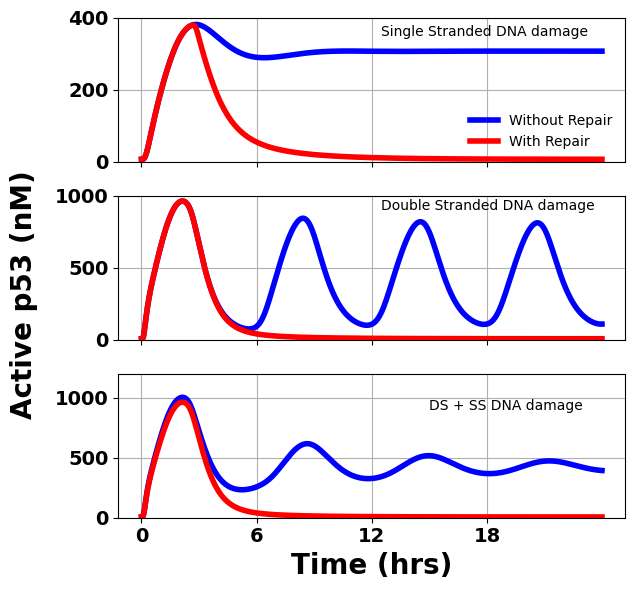

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

data_name = get_data_title()
with open(f'DNA-repair/results/{data_name}.pkl', 'rb') as f:
    data = pickle.load(f)

conds = list(data.keys())

# Set up a 3x1 subplot grid
fig, axs = plt.subplots(3, 1, figsize=(6, 6), sharex=True)

# --- helper to style ticks ---
def style_ticks(ax, axis="both"):
    ax.tick_params(axis=axis, labelsize=14)
    if axis in ["y", "both"]:
        for label in ax.get_yticklabels():
            label.set_fontweight("bold")
    if axis in ["x", "both"]:
        for label in ax.get_xticklabels():
            label.set_fontweight("bold")

# Plot single stranded break results
axs[0].plot(data[conds[0]]['p53_active']['time']/3600,
            data[conds[0]]['p53_active']['simulation'],
            label='Without Repair', color='blue', linewidth=4)
axs[0].plot(data[conds[1]]['p53_active']['time']/3600,
            data[conds[1]]['p53_active']['simulation'],
            label='With Repair', color='red', linewidth=4)
axs[0].grid(True)
axs[0].set_ylim(0, 400)
axs[0].set_xticks(np.arange(0, 24, step=6))
axs[0].legend(frameon=False)
axs[0].text(12.50, 350.0, 'Single Stranded DNA damage')
style_ticks(axs[0])

# Plot double stranded break results
axs[1].plot(data[conds[2]]['p53_active']['time']/3600,
            data[conds[2]]['p53_active']['simulation'],
            label='Without Repair', color='blue', linewidth=4)
axs[1].plot(data[conds[3]]['p53_active']['time']/3600,
            data[conds[3]]['p53_active']['simulation'],
            label='With Repair', color='red', linewidth=4)
axs[1].grid(True)
axs[1].set_xticks(np.arange(0, 24, step=6))
axs[1].set_ylim(0, 1000)
axs[1].text(12.50, 900.0, 'Double Stranded DNA damage')
style_ticks(axs[1])

# Plot single- and double-stranded break results
axs[2].plot(data[conds[4]]['p53_active']['time']/3600,
            data[conds[4]]['p53_active']['simulation'],
            label='Without Repair', color='blue', linewidth=4)
axs[2].plot(data[conds[5]]['p53_active']['time']/3600,
            data[conds[5]]['p53_active']['simulation'],
            label='With Repair', color='red', linewidth=4)
axs[2].grid(True)
axs[2].set_ylim(0, 1200)
axs[2].text(15.0, 900.0, 'DS + SS DNA damage')
axs[2].set_xlabel('Time (hrs)', weight='bold', fontsize=20)
style_ticks(axs[2], axis="both")

# Set the y-axis label (shared)
fig.text(-0.05, 0.5, 'Active p53 (nM)', va='center',
         rotation='vertical', weight='bold', fontsize=20)

plt.tight_layout()
fig.savefig(f'DNA-repair/results/{data_name}.png')

### p53 Dynamics Benchmark
[Compare to Erdem et al. Supp. Fig 6b](https://www.nature.com/articles/s41467-022-31138-1#MOESM1)\
Increasing DNA damage amount in single cells leads to higher number of activated p53 peaks.

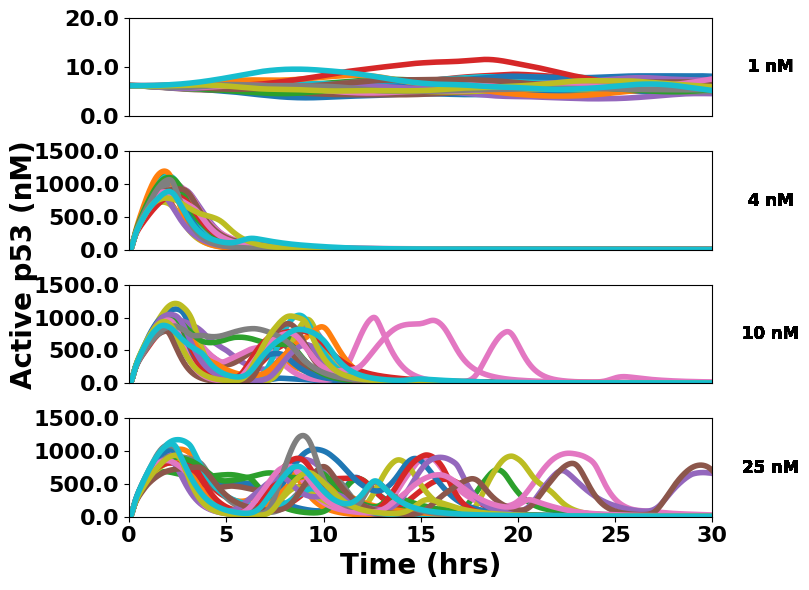

In [ ]:
data_name = get_data_title()
with open(f'p53-dynamics/results/{data_name}.pkl', 'rb') as f:
    data = pickle.load(f)

condition_concentrations = ['1 nM', '4 nM', '10 nM', '25 nM']

# instatiate the registry of simulations matching each condition of interest.
conds_registry = CellPopMetrics(data=data).get_registry()
del conds_registry['heterogenize']
fig, axes = plt.subplots(4,1, figsize=(8,6))
for i, condition in enumerate(conds_registry):
    for simulation in data:
        
        ax = axes[i]

        if simulation in conds_registry[condition] and 'p53_pulse' in data[simulation].keys():

            ax.plot(data[simulation]['p53_pulse']['time']/3600, data[simulation]['p53_pulse']['simulation'], linewidth=4)
            ax.text(
                    1.1, 0.5, condition_concentrations[i], horizontalalignment='center', 
                    verticalalignment='center', transform=ax.transAxes, fontsize=12, weight='bold'
                    )
            
            if condition == 'DamageDSB_1':
                ax.set_ylim(0, 20) 
            else:
                ax.set_ylim(0, 1500)
            # ax.set_title(condition)
            # ax.legend()
            ax.set_xlim(0, 30)
            ax.set_xticks([])
        if i==3:
            ax.set_xticks(np.arange(0, 31, step=5))
        
        ax.set_xticklabels(ax.get_xticks(), fontsize=16, weight='bold')
        ax.set_yticklabels(ax.get_yticks(), fontsize=16, weight='bold')
plt.subplots_adjust(hspace=0.5)
        # Set the x-axis label
axes[3].set_xlabel('Time (hrs)', weight='bold', fontsize=20)

# Set the y-axis label
fig.text(-0.05, 0.55, 'Active p53 (nM)', va='center', rotation='vertical', weight='bold', fontsize=20)
fig.text(1, 1, 'DNA\nDamage', va='center', weight='bold')
plt.tight_layout()
fig.savefig(f'p53-dynamics/results/{data_name}.png')

### TRAIL Time To Death Benchmark
[Compare to Erdem et al. Supp. Fig. 7ab](https://www.nature.com/articles/s41467-022-31138-1#MOESM1)\
Increasing simulated TRAIL dose decreases the time it takes to die for an average cell.

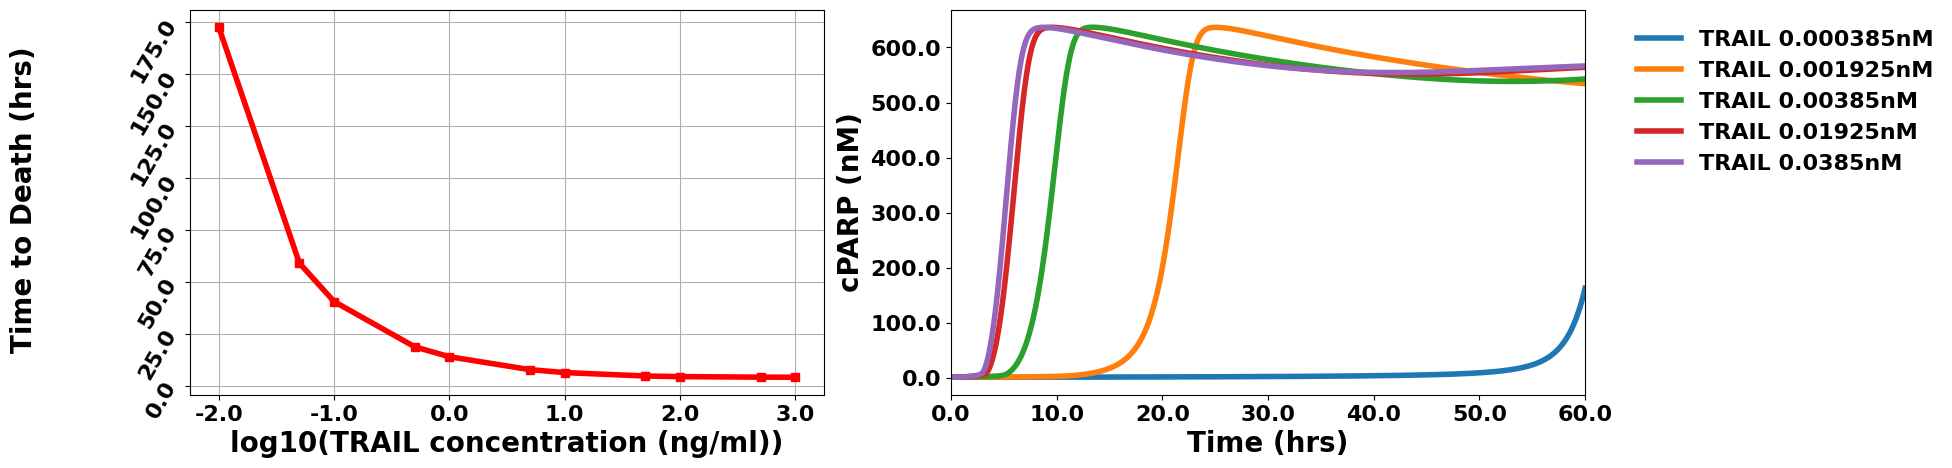

In [ ]:
data_name = get_data_title()
with open(f'TRAIL-time-to-death/results/{data_name}.pkl', 'rb') as f:
    data = pickle.load(f)

traildoses = np.array([0.000385, 0.001925, 0.00385, 0.01925, 0.0385, 0.1925, 0.385, 1.9250, 3.85, 19.25, 38.5])
dosesngperml = traildoses*2.597402597402597e+01

conditions =[]
for condition in data:
    conditions.append(condition)

legend = []
for dose in traildoses:
    legend.append('TRAIL ' + str(dose) + 'nM')
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
for i in range(1,11,2):

    axs[1].plot(data[conditions[i]]['cPARP_total']['time']/3600, 
                data[conditions[i]]['cPARP_total']['simulation'], linewidth=4)
    axs[1].set_xlim([0, 60])
    axs[1].set_xticklabels(axs[1].get_xticks(), fontsize=16, weight='bold')
    axs[1].set_yticklabels(axs[1].get_yticks(), fontsize=16, weight='bold')
    legend_properties = {'weight':'bold', 'size':16}
    axs[1].legend(labels=legend, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16, frameon=False, prop=legend_properties)


time_of_death = CellDeathMetrics(data, 'cPARP_total').average_time_to_death()

axs[0].plot(np.log10(dosesngperml),[tod/3600 for tod in time_of_death.values()],marker='s',linewidth=4, color='red')
axs[0].set_xticklabels(axs[0].get_xticks(), fontsize=16, weight='bold')
axs[0].set_yticklabels(axs[0].get_yticks(), fontsize=16, weight='bold', rotation=60)
axs[0].grid(True)

# Set the x-axis label
axs[0].set_xlabel('log10(TRAIL concentration (ng/ml))', weight='bold', fontsize=20)
axs[1].set_xlabel('Time (hrs)', weight='bold', fontsize=20)

axs[1].set_ylabel('cPARP (nM)', weight='bold', fontsize=20)

# Set the y-axis label
fig.text(0.025, 0.5, 'Time to Death (hrs)', va='center', rotation='vertical', weight='bold', fontsize=20)

fig.savefig(f'TRAIL-time-to-death/results/{data_name}.png', dpi=300, bbox_inches='tight')

### TRAIL Percent Survival Benchmark
[Compare to Erdem et al. Supp. Fig.7c ](https://www.nature.com/articles/s41467-022-31138-1#MOESM1)\
The fraction of surviving cells decreases as stimulated TRAIL dose increases.

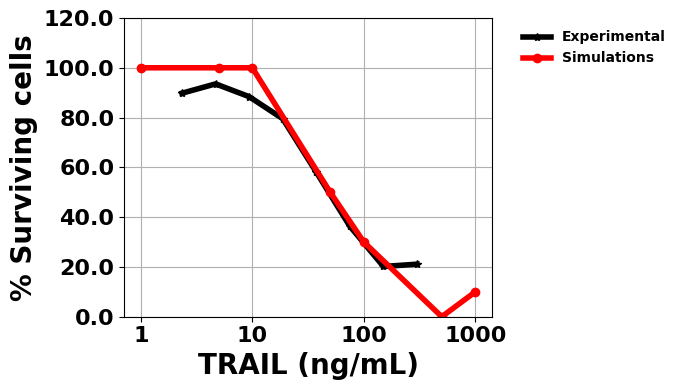

In [8]:
data_name = get_data_title()
with open(f'TRAIL-percent-death/results/{data_name}.pkl', 'rb') as f:
    data = pickle.load(f)


doses = [0.0385, 0.1925, 0.385, 1.925, 3.85, 19.25, 38.5]
alive_ratio = CellDeathMetrics(data, 'cPARP_total').alive_ratio(percent=True)

dosesngperml = np.array(doses)*2.597402597402597e+01

trailexpdoses = [2.34375,4.6875,9.375,18.75,37.5,75.0,150.0,300.0] # From Bouhaddou2018 model paper
trailexppdeath = [89.79,93.53,88.40,79.53,58.08,36.34,20.18,21.11] # From Bouhaddou2018 model paper

plt.figure(figsize=(7, 4))
plt.plot(np.log10(np.array(trailexpdoses)),np.array(trailexppdeath),
          marker='*', color = 'black', linewidth=4, label='Experiment') # Experimental
plt.plot(np.log10(np.array(dosesngperml)),
          alive_ratio,marker='o', color='red', 
          linewidth=4, label='Simulation') # Simulations
plt.xlabel('TRAIL (ng/mL)', multialignment='center', 
            fontsize=20, weight='bold')
plt.ylabel('% Surviving cells', 
            fontsize=20, weight='bold')
plt.grid(True)

plt.ylim(0, 120)
plt.xticks(np.arange(0,4,step=1),('1', '10', '100', '1000'), 
            weight='bold', fontsize=16)
ax = plt.gca()
ax.set_yticklabels(ax.get_yticks(), weight='bold', fontsize=16)
legend_properties = {'weight':'bold'}
plt.legend(['Experimental','Simulations'], frameon = False, 
            bbox_to_anchor=[1.05, 1], loc='upper left', 
            fontsize=16, prop=legend_properties)
plt.tight_layout()
plt.savefig(f'TRAIL-percent-death/results/{data_name}.png', dpi=300, bbox_inches='tight')

### Survival Signaling Benchmark
[Compare to Erdem et al. Supp. Fig. 7d](https://www.nature.com/articles/s41467-022-31138-1#MOESM1)\
Increasing ERK and AKT activity levels prolongs TRAIL induced time to death, whereas increasing PUMA and NOXA expression levels decreases the time it takes for cells to die.

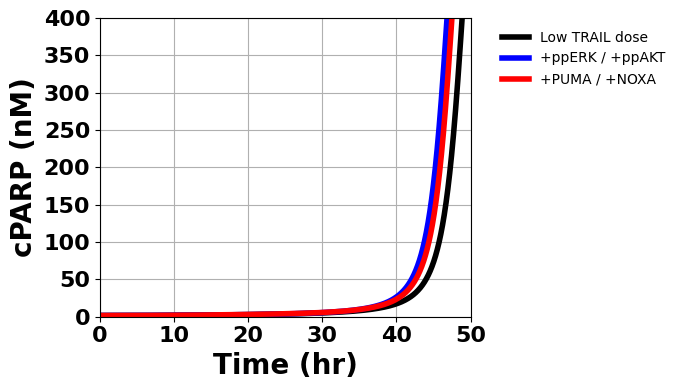

In [7]:
data_name = get_data_title()
with open(f'survival-signaling/results/{data_name}.pkl', 'rb') as f:
    data = pickle.load(f)

conditions = []
for condition in data:
    conditions.append(condition)

plt.figure(figsize=(7, 4))
plt.plot(data[conditions[0]]['cPARP_total']['time']/3600, 
         data[conditions[0]]['cPARP_total']['simulation'], label='TRAIL only', linewidth=4, color='black')
plt.plot(data[conditions[1]]['cPARP_total']['time']/3600, 
         data[conditions[1]]['cPARP_total']['simulation'], label='+ppERK/+ppAKT', linewidth=4, color='blue')
plt.plot(data[conditions[2]]['cPARP_total']['time']/3600, 
         data[conditions[2]]['cPARP_total']['simulation'], label='+PUMA/+NOXA', linewidth=4, color='red')
plt.xlabel('Time (hr)', fontsize=20, weight='bold')
plt.ylabel('cPARP (nM)', fontsize=20, weight='bold')
plt.grid(True)
plt.xlim(0, 50)
plt.ylim(0, 400)
plt.xticks(fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')
plt.legend(['Low TRAIL dose','+ppERK / +ppAKT','+PUMA / +NOXA'], bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.tight_layout()
plt.savefig(os.path.join(f'survival-signaling/results/{data_name}.png'), dpi=300)

### Cell Cycle Benchmark
[Compare to Erdem et al. Supp Fig. 8a](https://www.nature.com/articles/s41467-022-31138-1#MOESM1)\
Increasing Cyclin D mRNA levels induces proper cyclin-CDK complex progression and oscillations for cell cycle entry and progression.

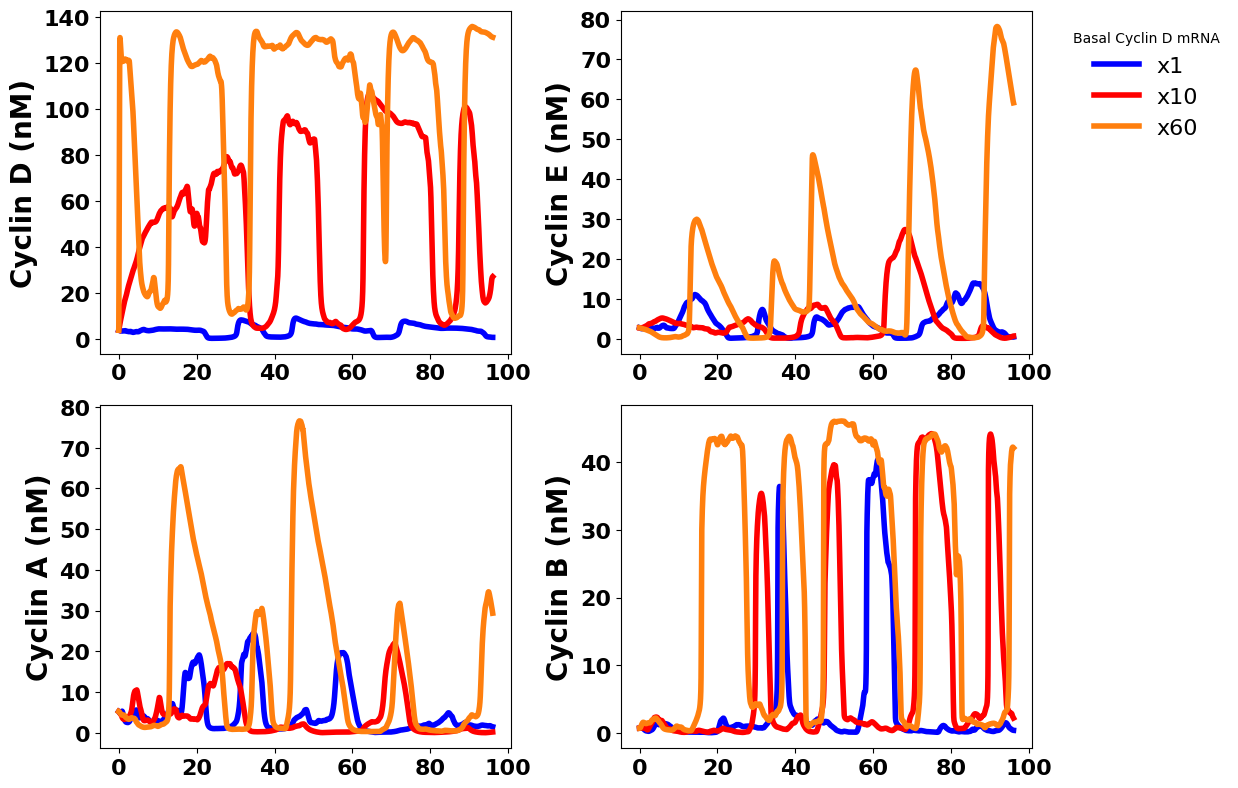

In [15]:
data_name = get_data_title()
with open(f'cell_cycle/results/{data_name}.pkl', 'rb') as f:
    data = pickle.load(f)

conditions = []
for key in data:
    conditions.append(key)

fig, ax = plt.subplots(2,2, figsize=(12.5,8))

#Cyclin D plot
ax[0,0].plot(data[conditions[0]]['Cd_total']['time']/3600, data[conditions[0]]['Cd_total']['simulation'], linewidth=4, color='b')
ax[0,0].plot(data[conditions[1]]['Cd_total']['time']/3600, data[conditions[1]]['Cd_total']['simulation'], linewidth=4, color='r')
ax[0,0].plot(data[conditions[2]]['Cd_total']['time']/3600, data[conditions[2]]['Cd_total']['simulation'], linewidth=4, color='tab:orange')
ax[0,0].set_yticklabels(ax[0,0].get_yticks().astype(int), weight='bold', fontsize=16)
ax[0,0].set_xticklabels(ax[0,0].get_xticks().astype(int), weight='bold', fontsize=16)
ax[0,0].set_ylabel('Cyclin D (nM)', weight='bold', fontsize=20)

#Cyclin E plot
ax[0,1].plot(data[conditions[0]]['Ce_total']['time']/3600, data[conditions[0]]['Ce_total']['simulation'], linewidth=4, color='b')
ax[0,1].plot(data[conditions[1]]['Ce_total']['time']/3600, data[conditions[1]]['Ce_total']['simulation'], linewidth=4, color='r')
ax[0,1].plot(data[conditions[2]]['Ce_total']['time']/3600, data[conditions[2]]['Ce_total']['simulation'], linewidth=4, color='tab:orange')
ax[0,1].set_yticklabels(ax[0,1].get_yticks().astype(int), weight='bold', fontsize=16)
ax[0,1].set_xticklabels(ax[0,1].get_xticks().astype(int), weight='bold', fontsize=16)
ax[0,1].set_ylabel('Cyclin E (nM)', weight='bold', fontsize=20)
ax[0,1].legend(['x1', 'x10', 'x60'], title = 'Basal Cyclin D mRNA', 
               bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, fontsize=16)

#Cyclin A plot
ax[1,0].plot(data[conditions[0]]['Ca_total']['time']/3600, data[conditions[0]]['Ca_total']['simulation'], linewidth=4, color='b')
ax[1,0].plot(data[conditions[1]]['Ca_total']['time']/3600, data[conditions[1]]['Ca_total']['simulation'], linewidth=4, color='r')
ax[1,0].plot(data[conditions[2]]['Ca_total']['time']/3600, data[conditions[2]]['Ca_total']['simulation'], linewidth=4, color='tab:orange')
ax[1,0].set_yticklabels(ax[1,0].get_yticks().astype(int), weight='bold', fontsize=16)
ax[1,0].set_xticklabels(ax[1,0].get_xticks().astype(int), weight='bold', fontsize=16)
ax[1,0].set_ylabel('Cyclin A (nM)', weight='bold', fontsize=20)

#Cyclin B plot
ax[1,1].plot(data[conditions[0]]['Cb_total']['time']/3600, data[conditions[0]]['Cb_total']['simulation'], linewidth=4, color='b')
ax[1,1].plot(data[conditions[1]]['Cb_total']['time']/3600, data[conditions[1]]['Cb_total']['simulation'], linewidth=4, color='r')
ax[1,1].plot(data[conditions[2]]['Cb_total']['time']/3600, data[conditions[2]]['Cb_total']['simulation'], linewidth=4, color='tab:orange')
ax[1,1].set_yticklabels(ax[1,1].get_yticks().astype(int), weight='bold', fontsize=16)
ax[1,1].set_xticklabels(ax[1,1].get_xticks().astype(int), weight='bold', fontsize=16)
ax[1,1].set_ylabel('Cyclin B (nM)', weight='bold', fontsize=20)

fig.tight_layout()
fig.savefig(f'cell_cycle/results/{data_name}.png', dpi=300)

### Etoposide Induced Cell Death Benchmark
[Compare to Erdem et al. Fig. 3e](https://www.nature.com/articles/s41467-022-31138-1#Fig3)\
Etoposide treatment induces cell cycle arrest and cell death. Cycling cells (with prior growth factor stimulation) show increased percentage of death to etoposide treatment, compared to non-cycling cells.

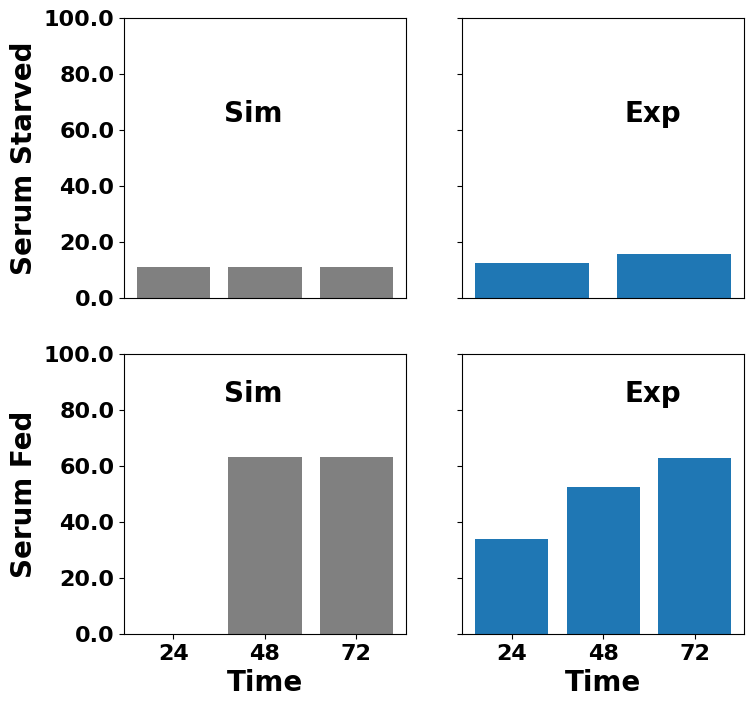

In [2]:
# Main code execution
data_name = get_data_title()
data_file = f'etoposide-induced-cell-death/results/{data_name}.pkl'
data = Helpers.load_data(data_file)
conds_registry = CellPopMetrics(data).get_registry()
CELLS_PER_SIM_CONDITION = 100

dead_cells_sim = CellDeathMetrics(data, 'cPARP_100plus').time_to_death()
dead_cells_exp = Helpers.extract_experimental_data(data, 'cPARP_100plus')

dead_cells_per_cond_sim = CellDeathMetrics.calculate_dead_cells(dead_cells_sim, CELLS_PER_SIM_CONDITION)
dead_cells_per_cond_exp = CellDeathMetrics.match_calculate_dead_cells_struct(dead_cells_exp)

# Plotting
split_left_right = LeftRightSplit(nrows = 2, ncols = 2, figsize = (8, 8), width_ratios = [4,4])
split_left_right.plot_left_bar(data=dead_cells_per_cond_sim, colors = ['grey', 'grey'], error_bars=False, x_labels=['24', '48', '72'], y_range=[0, 100])

split_left_right.plot_right(dead_cells_per_cond_exp, error_bars=False, x_labels=['24', '48', '72'], y_range=[0, 100])

split_left_right.disable_axes_labels(axes='right', y_axis=True)

split_left_right.add_text(text='Sim', x=0.25, y=0.75, fontsize=20, weight='bold')
split_left_right.add_text(text='Sim', x=0.25, y=0.4, fontsize=20, weight='bold')
split_left_right.add_text(text='Exp', x=0.75, y=0.75, fontsize=20, weight='bold')
split_left_right.add_text(text='Exp', x=0.75, y=0.4, fontsize=20, weight='bold')

split_left_right.axes_left[0].set_ylabel('Serum Starved', fontsize = 20, weight = 'bold')
split_left_right.axes_left[1].set_ylabel('Serum Fed', fontsize = 20, weight = 'bold')
split_left_right.axes_left[1].set_xlabel('Time', fontsize=20, weight='bold')
split_left_right.axes_right[1].set_xlabel('Time', fontsize=20, weight='bold')
split_left_right.show()

### Inhibition of Stochastic Apoptosis Benchmark
[Compare to Erdem et al. Supp. Fig. 9](https://www.nature.com/articles/s41467-022-31138-1#MOESM1)\
Inhibition of AKT and ERK pathways together synergistically increase cell death, in EGF and insulin stimulated cells.

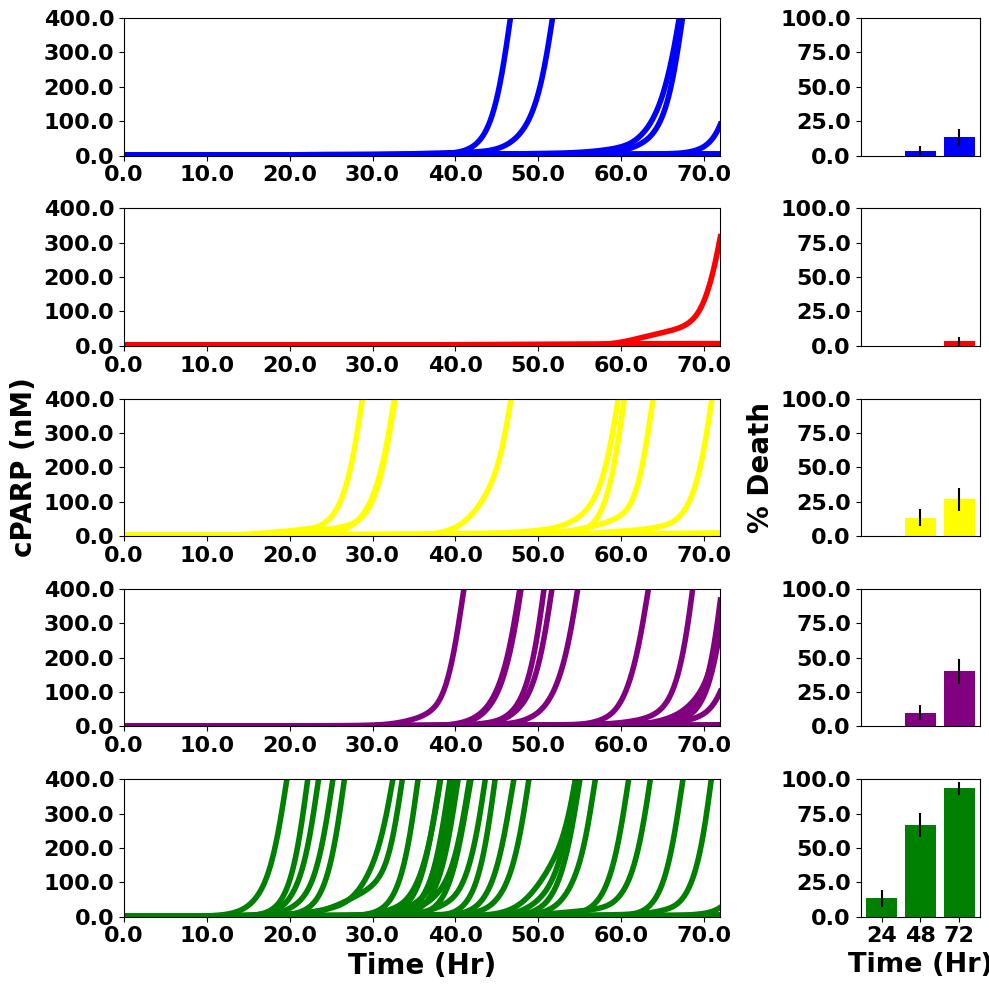

In [5]:
data_name = get_data_title()
COLORS = ['blue', 'red', 'yellow', 'purple', 'green']
CELLS_PER_CONDITION = 30  # Define the number of cells per condition


# Main code execution
data_file = f'inhibition-of-stochastic-apoptosis/results/{data_name}.pkl'
data = Helpers.load_data(data_file)
conds_registry = CellPopMetrics(data).get_registry()
del conds_registry['serum_starved']
# Plotting
split_left_right = LeftRightSplit(nrows = 5, ncols = 2, figsize = (10, 10), width_ratios = [5,1])
split_left_right.plot_left(data=data, observable = 'cPARP_total', dependent_var='time', 
                           independent_var='simulation', 
                           conds_registry=conds_registry, colors = COLORS)

dead_cells = CellDeathMetrics(data, 'cPARP_total').time_to_death()
dead_cells_24to72 = CellDeathMetrics.calculate_dead_cells(dead_cells, CELLS_PER_CONDITION)

split_left_right.plot_right(dead_cells_24to72, error_bars=True, x_labels=['24', '48', '72'], 
                            y_range=[0, 100], colors=COLORS, CELLS_PER_CONDITION=CELLS_PER_CONDITION)

split_left_right.axes_left[2].set_ylabel('cPARP (nM)', fontsize = 20, weight = 'bold')
split_left_right.axes_left[4].set_xlabel('Time (Hr)', fontsize=20, weight = 'bold')

split_left_right.axes_right[2].set_ylabel('% Death', fontsize = 20, weight = 'bold')
split_left_right.axes_right[4].set_xlabel('Time (Hr)', fontsize = 19.5, weight = 'bold')

plt.tight_layout()
plt.savefig(f'inhibition-of-stochastic-apoptosis/results/{data_name}.png', dpi=300)

### BIM Dependent ERK Inhibition Benchmark
[Compare to Erdem et al. Supp. Fig. 10a](https://www.nature.com/articles/s41467-022-31138-1#MOESM1)\
ERK and AKT inhibition-induced cell death mechanisms are predominantly BIM dependent, not BAD dependent.

In [ ]:
data_name = get_data_title()
with open(f'BIM-dependent-ERK-inhibition/results/{data_name}.pkl', 'rb') as f:
    data = pickle.load(f)

dead_cells = CellDeathMetrics(data, 'cPARP_total').death_ratio(percent=True)
dead_cell_values = np.array(list(dead_cells.values()))
conditions = []
for condition in data:
    conditions.append(condition)

labels=['BAD-dependent', 'BIM-dependent']

num_cells = len(data[conditions[0]])
dc_sem = np.sqrt((dead_cell_values*(100-dead_cell_values))/num_cells)

fig = plt.figure(figsize=(3, 4))
plt.bar(dead_cells.keys(), dead_cells.values(), yerr=dc_sem, capsize=5, color='blue')
plt.ylim(0, 100)
plt.yticks(np.arange(0, 150, 50), fontsize=16, weight='bold')
plt.ylabel('% Death', fontsize=16, weight='bold')
plt.xticks(ticks=range(len(dead_cells)), labels=labels,rotation=45, fontsize=16, weight='bold')
# plt.title('E + I @ 48 hours (SPARCED)', y=1.05)
plt.tight_layout()

# plt.savefig(f'BIM-dependent-ERK-inhibition/results/{data_name}.png', dpi=300)

### Regulation of stochastic proliferation Benchmark
[Compare to Erdem et al. Supp. Fig. 10b](https://www.nature.com/articles/s41467-022-31138-1#MOESM1)\
EGF and insulin cooperatively induce cell cycle entry, with insulin inducing very little cell cycle entry alone.

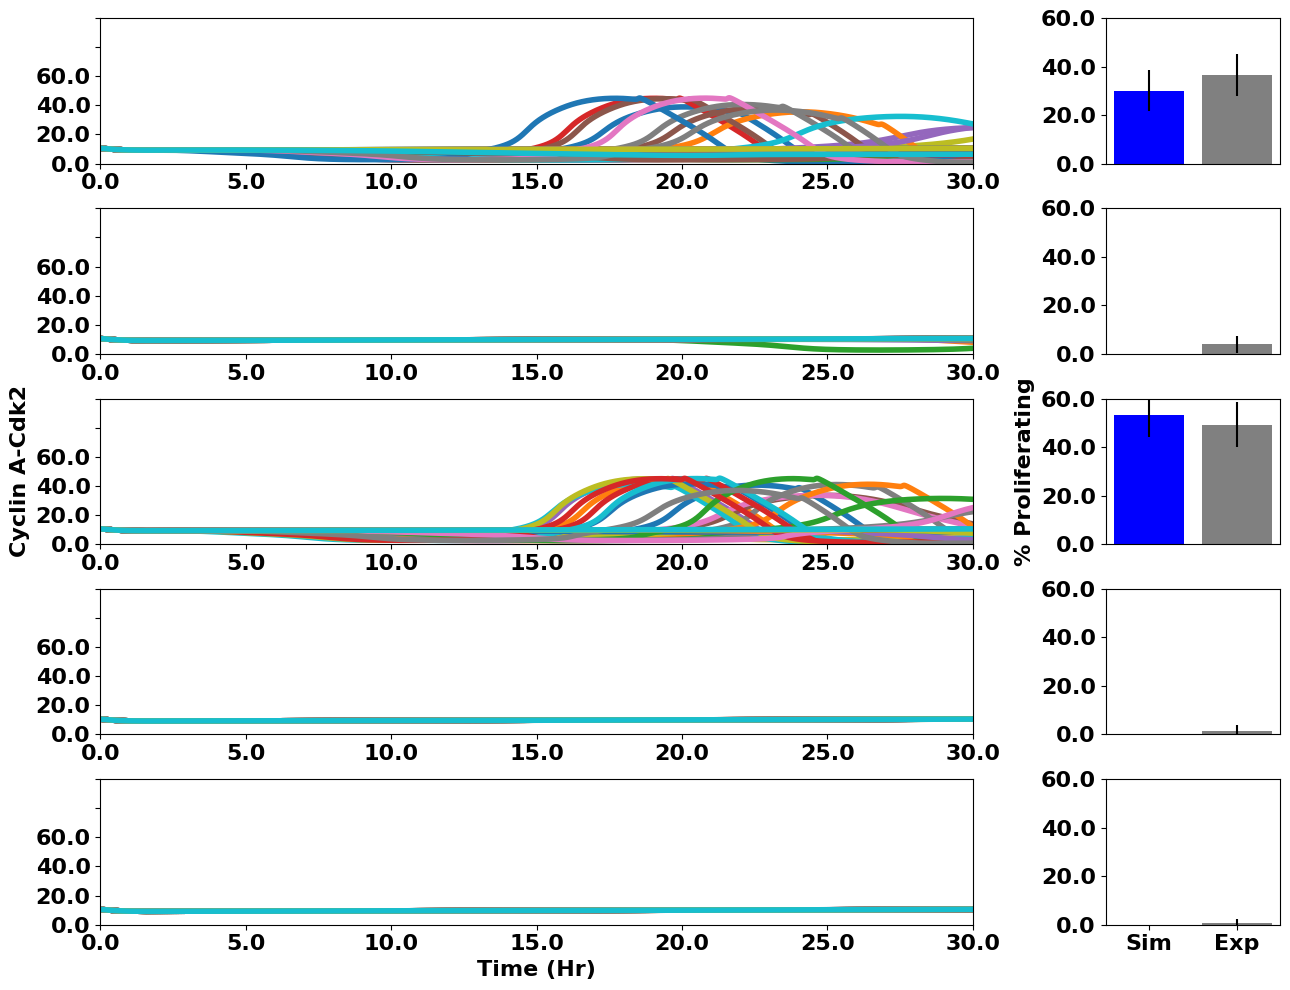

In [2]:
data_name = get_data_title()
data_file = f'regulation-of-stochastic-proliferation/results/{data_name}.pkl'
data = Helpers.load_data(data_file)
conds_registry = CellPopMetrics(data).get_registry()
del conds_registry['heterogenize']
cond_labels = ['EGF', 'INS', 'EGF+INS', 'EGF+INS+MEKi', 'EGF+INS+AKTi']

# Constants
SPHASE_THRESHOLD = 20 # Summation of Cyclin Complexes over the course of the simulation
CELLS_PER_CONDITION = 30 # Define the number of cells per condition

# Plotting
split_left_right = LeftRightSplit(nrows = 5, ncols = 2, figsize = (13, 10), width_ratios = [5,1])

split_left_right.plot_left(data=data, 
                           observable='cycA_Cdk2_total',
                           dependent_var='time', 
                           independent_var='simulation', 
                           conds_registry=conds_registry, 
                           colors = None, 
                           yaxis_limits=(0, 50), 
                           xaxis_limits=(0, 30))

sphase_ratios = CellPopMetrics(data=data).cells_above_threshold(observable='Sphase', 
                                                                    threshold= SPHASE_THRESHOLD, 
                                                                    experimental_data=True)

split_left_right.plot_right(sphase_ratios, 
                            error_bars=True, 
                            x_labels=['Sim', 'Exp'],
                            y_range=[0, 60], 
                            colors=['blue', 'grey'], 
                            CELLS_PER_CONDITION=CELLS_PER_CONDITION)

split_left_right.axes_left[2].set_ylabel('Cyclin A-Cdk2', fontsize=16, weight='bold')
split_left_right.axes_left[4].set_xlabel('Time (Hr)', fontsize = 16, weight = 'bold')

split_left_right.axes_right[2].set_ylabel('% Proliferating', fontsize = 16, weight = 'bold')
split_left_right.fig.tight_layout()
split_left_right.save_plot(f'regulation-of-stochastic-proliferation/results/{data_name}.png')


### Ribosome Doubling Rate Benchmark
[Compare to Erdem et al. Supp. Fig. 8b](https://www.nature.com/articles/s41467-022-31138-1#MOESM1)\
The number of ribosomes within the cell doubles within 24 h.

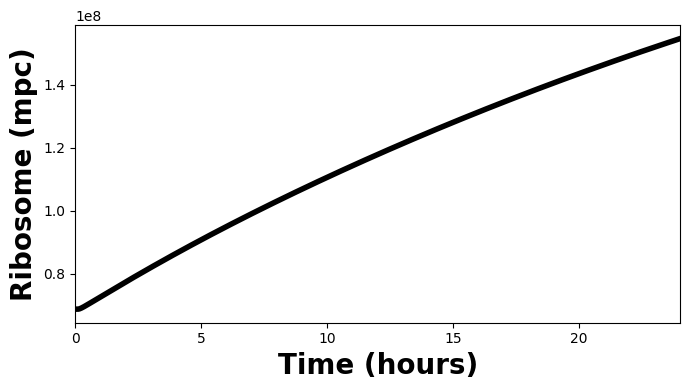

In [6]:
data_name = get_data_title()
with open(f'ribosome-doubling-rate/results/{data_name}.pkl', 'rb') as f:
    data = pickle.load(f)
Vc = 5.25E-12

conditions = []
for condition in data:
    conditions.append(condition)

plt.figure(figsize=(7, 4))

yy = np.array([nanomolar2mpc(value, Vc) for value in data[conditions[0]]['Ribosome_total']['simulation']])
tt = (data[conditions[0]]['Ribosome_total']['time']/3600)
plt.plot(tt, yy,linewidth=4, color='black')
plt.xlim([0, 24])
plt.ylabel('Ribosome (mpc)', fontsize=20, weight='bold')
plt.xlabel('Time (hours)', fontsize=20, weight='bold')
plt.tight_layout()
plt.savefig(f'ribosome-doubling-rate/results/{data_name}.png')

### ERK and AKT Dose Dependent Responses Benchmark
[Compare to Erdem et al. Supp. fig 5](https://www.nature.com/articles/s41467-022-31138-1#MOESM1)\
EGF and insulin stimulation activates both ERK and AKT pathways. Dual stimulation with the two ligands induces prolonged AKT activation.

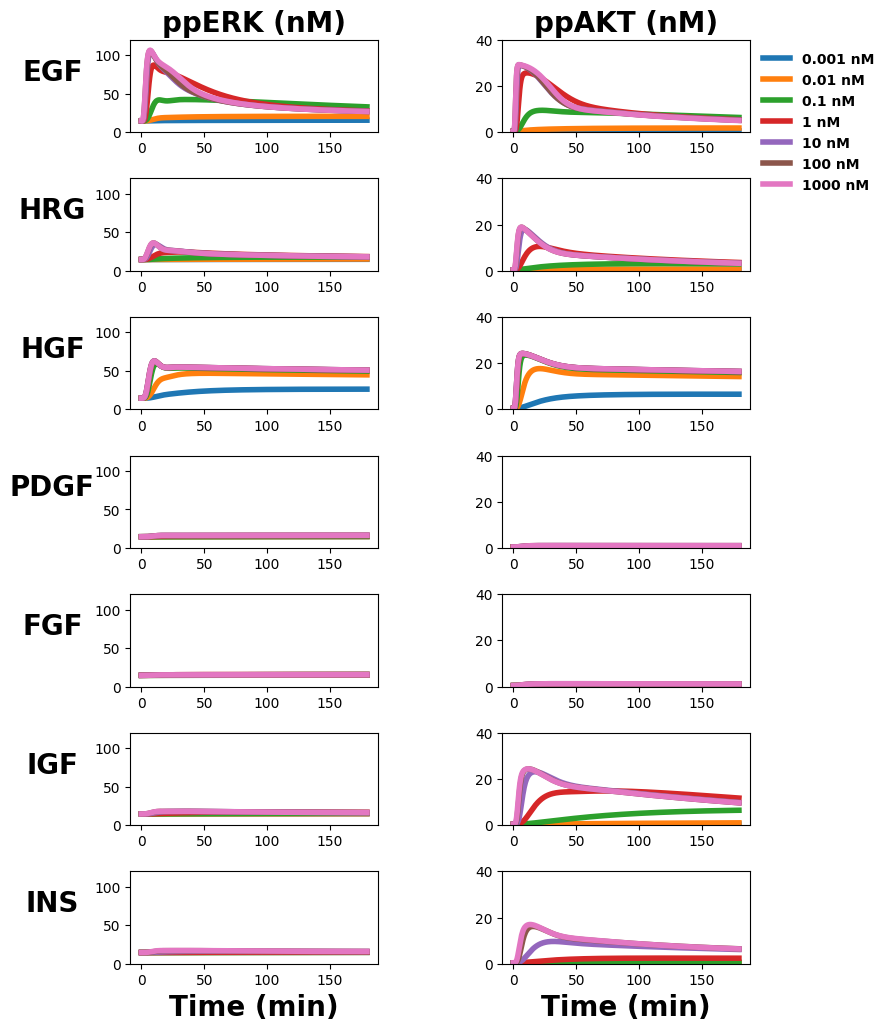

In [16]:
data_name = get_data_title()
with open(f'ERK-AKT-dose-response/results/{data_name}.pkl', 'rb') as f:
    data = pickle.load(f)

conditional_strings = ['EGF', 'HRG', 'HGF', 'PDGF', 'FGF', 'IGF', 'INS']
fig, axes = plt.subplots(7, 2, figsize=(8, 12))
conditions = []
for condition in data:
    conditions.append(condition)

for i in range(7):
    upper = (i+1)*7
    lower = upper - 7
    for j in range(lower, upper):
        axes[i, 0].plot(data[conditions[j]]['ppERK_total']['time'] / 60, 
                        data[conditions[j]]['ppERK_total']['simulation'], linewidth=4)
        axes[i, 1].plot(data[conditions[j]]['ppAKT_total']['time'] / 60, 
                        data[conditions[j]]['ppAKT_total']['simulation'], linewidth=4)

    axes[i, 0].set_ylim(0, 120)
    axes[i, 1].set_ylim(0, 40)
    axes[i, 0].set_ylabel(conditional_strings[i], fontsize=20, weight='bold', labelpad=30, rotation=0)

axes[6, 0].set_xlabel('Time (min)', fontsize = 20, weight='bold')
axes[6, 1].set_xlabel('Time (min)', fontsize = 20, weight='bold')

axes[0,0].set_title('ppERK (nM)', fontsize = 20, weight='bold')

axes[0,1].set_title('ppAKT (nM)', fontsize = 20, weight='bold')

legend_values = ['0.001 nM', '0.01 nM', '0.1 nM', '1 nM', '10 nM', '100 nM', '1000 nM']
legend_properties = {'weight':'bold'}
axes[0, 1].legend(labels = legend_values, loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=20, prop=legend_properties)


# plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.5)

fig.savefig(f'ERK-AKT-dose-response/results/{data_name}.png', dpi=300, bbox_inches='tight')

## Validations Complete

## References:
* Erdem, C., Mutsuddy, A., Bensman, E.M. et al. A scalable, open-source implementation of a large-scale mechanistic model for single cell proliferation and death signaling. Nat Commun 13, 3555 (2022). [https://doi.org/10.1038/s41467-022-31138-1](https://doi.org/10.1038/s41467-022-31138-1)